In [102]:
import numpy as np
import matplotlib.pyplot as plt
from CPMG.decom_utils import *
from scipy.signal import find_peaks

In [103]:
MAGNETIC_FIELD = 403            # Unit: Gauss
GYRO_MAGNETIC_RATIO = 1.07*1000 # Unit: Herts
wl = MAGNETIC_FIELD*GYRO_MAGNETIC_RATIO*2*3.14

t = np.load('../../../../TimTaminiau/20190610_time_no_duplicated.npy')[:13500]*1e-6

In [95]:
wl

2707998.8000000003

In [96]:
def exact(AB_list):
    M_list_temp = 1
    for A, B in AB_list:
        mz = (A + wl) / wl
        mx = B / wl
        w_tilda = pow(pow(A+wl, 2) + B*B, 1/2)
        alpha = w_tilda * t
        beta = wl * t

        phi = np.arccos(np.cos(alpha) * np.cos(beta) - mz * np.sin(alpha) * np.sin(beta))
        K1 = (1 - np.cos(alpha)) * (1 - np.cos(beta))
        K2 = 1 + np.cos(phi)
        K = pow(mx,2) * (K1 / K2)
        M_list_temp *= (1 - K * pow(np.sin(32 * phi/2), 2))
    return (M_list_temp + 1) / 2

def N(A, B):
    M_list_temp = 1
    w_tilda = pow(pow(A+wl, 2) + B*B, 1/2)
    mz = (A + wl) / w_tilda
    mx = B / w_tilda

    alpha = w_tilda * t
    beta = wl * t
    phi = np.arccos(np.cos(alpha) * np.cos(beta) - mz * np.sin(alpha) * np.sin(beta))
    K1 = mx * mx * (1 - np.cos(alpha)) * (1 - np.cos(beta)) / 2
    K2 = 32 * np.cos(8 * phi) * np.cos(4 * phi) * np.cos(2 * phi) * np.cos(phi) * np.sin(phi / 2)
    return K1 * K2**2

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


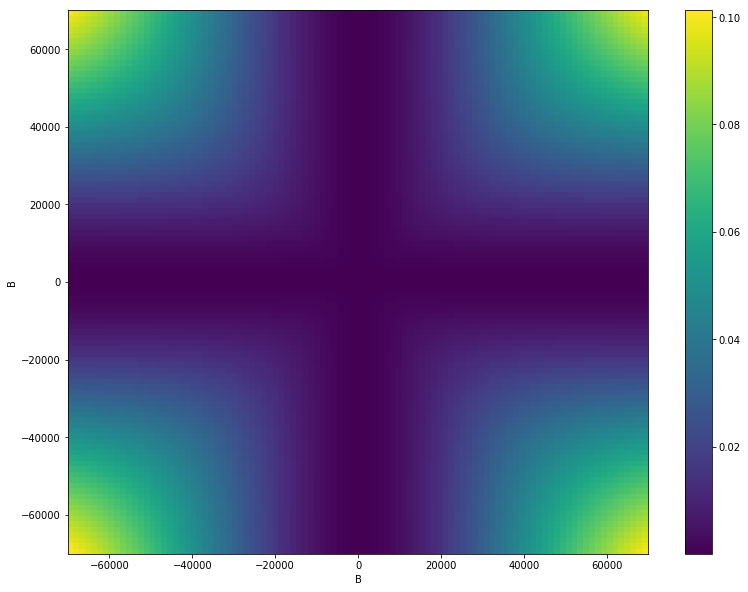

In [98]:
correlationA10000 = np.zeros((100, 100))
A = 10000
B_list = np.linspace(-70000, 70000, 100)
for i, B1 in enumerate(B_list):
    print(i)
    for j, B2 in enumerate(B_list):
        correlationA10000[i, j] = np.linalg.norm(N(A, B1) * N(A, B2), 1)/np.linalg.norm(N(A, B1) + N(A, B2), 1)
fig, ax= plt.subplots(figsize=(13, 10))       
pc = ax.pcolor(B_list, B_list, correlationA10000)
ax.set_xlabel('B')
ax.set_ylabel('B')
plt.colorbar(pc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


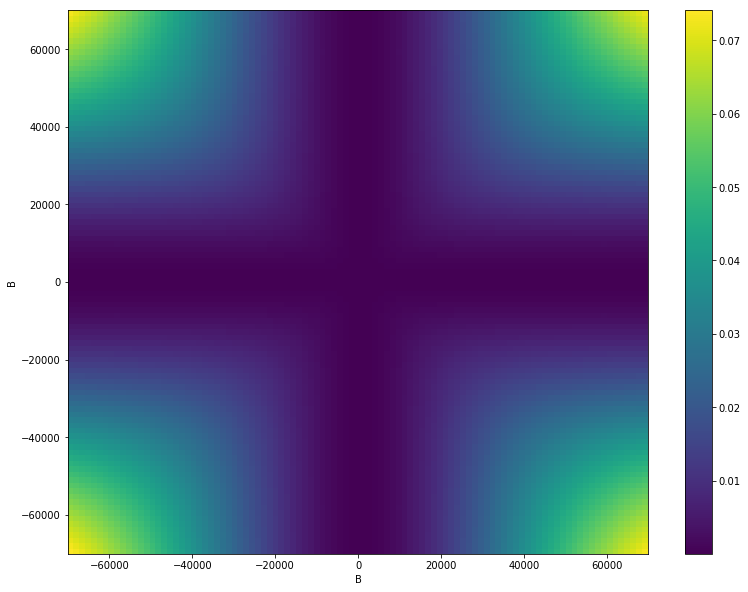

In [104]:
correlationA40000 = np.zeros((100, 100))
A = 40000
B_list = np.linspace(-70000, 70000, 100)
for i, B1 in enumerate(B_list):
    print(i)
    for j, B2 in enumerate(B_list):
        correlationA40000[i, j] = np.linalg.norm(N(A, B1) * N(A, B2), 1)/np.linalg.norm(N(A, B1) + N(A, B2), 1)
fig, ax= plt.subplots(figsize=(13, 10))       
pc = ax.pcolor(B_list, B_list, correlationA40000)
ax.set_xlabel('B')
ax.set_ylabel('B')
plt.colorbar(pc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


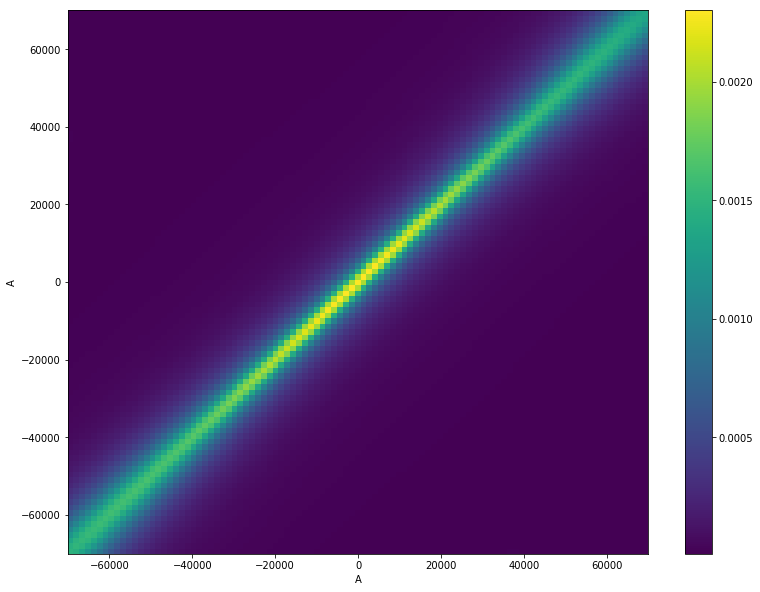

In [105]:
correlationB10000 = np.zeros((100, 100))
B = 10000
A_list = np.linspace(-70000, 70000, 100)
for i, A1 in enumerate(A_list):
    print(i)
    for j, A2 in enumerate(A_list):
        correlationB10000[i, j] = np.linalg.norm(N(A1, B) * N(A2, B), 1)/np.linalg.norm(N(A1, B) + N(A2, B), 1)
fig, ax= plt.subplots(figsize=(13, 10))       
pc = ax.pcolor(A_list, A_list, correlationB10000)
ax.set_xlabel('A')
ax.set_ylabel('A')
plt.colorbar(pc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


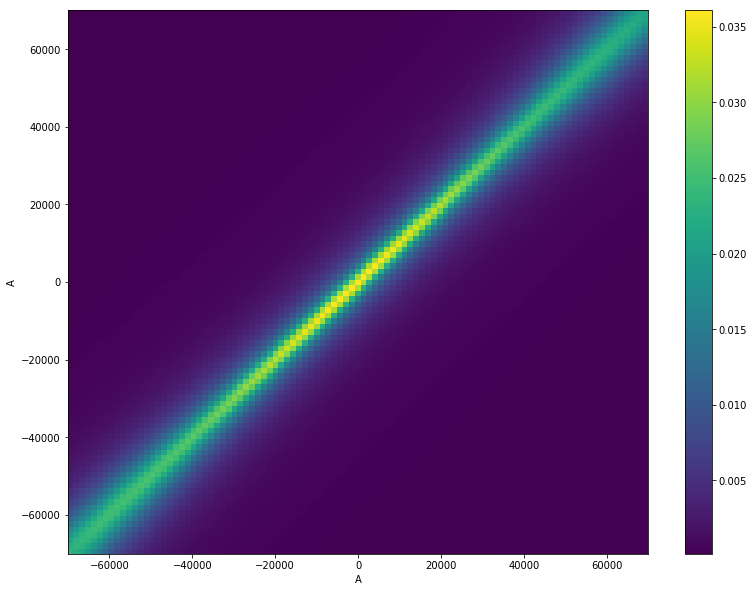

In [106]:
correlationB40000 = np.zeros((100, 100))
B = 40000
A_list = np.linspace(-70000, 70000, 100)
for i, A1 in enumerate(A_list):
    print(i)
    for j, A2 in enumerate(A_list):
        correlationB40000[i, j] = np.linalg.norm(N(A1, B) * N(A2, B), 1)/np.linalg.norm(N(A1, B) + N(A2, B), 1)
fig, ax= plt.subplots(figsize=(13, 10))       
pc = ax.pcolor(A_list, A_list, correlationB40000)
ax.set_xlabel('A')
ax.set_ylabel('A')
plt.colorbar(pc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


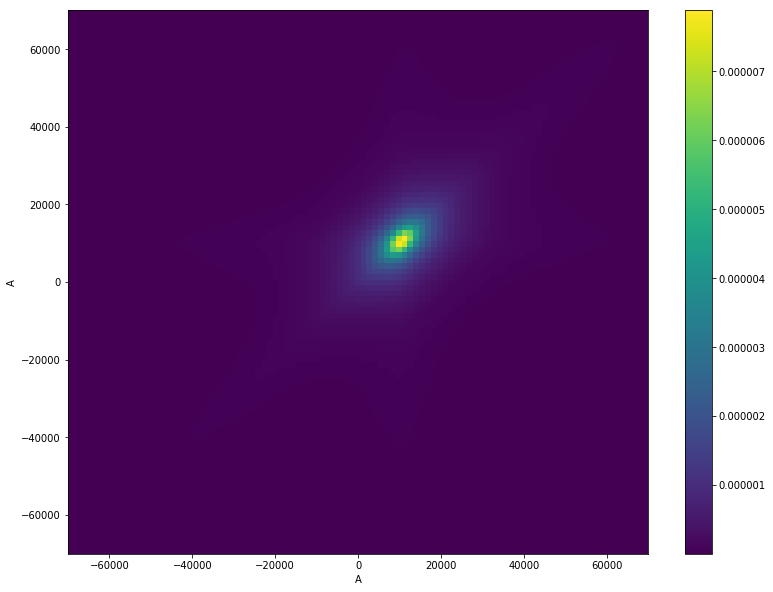

In [107]:
correlationB10000 = np.zeros((100, 100))
B = 10000
A0 = 10000
A_list = np.linspace(-70000, 70000, 100)
for i, A1 in enumerate(A_list):
    print(i)
    for j, A2 in enumerate(A_list):
        correlationB10000[i, j] = np.linalg.norm(N(A0, B) * N(A1, B) * N(A2, B), 1)/np.linalg.norm(N(A1, B) + N(A2, B) + N(A0, B), 1)
fig, ax= plt.subplots(figsize=(13, 10))       
pc = ax.pcolor(A_list, A_list, correlationB10000)
ax.set_xlabel('A')
ax.set_ylabel('A')
plt.colorbar(pc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


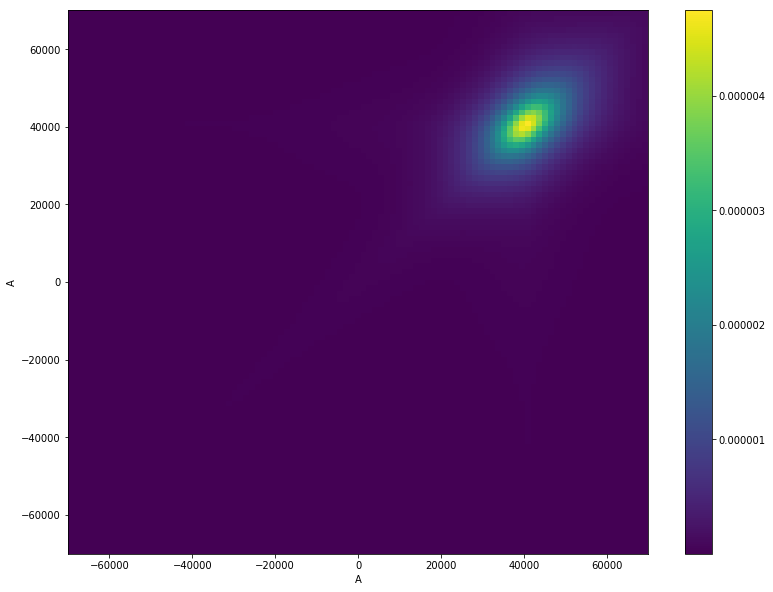

In [108]:
correlationB10000 = np.zeros((100, 100))
B = 10000
A0 = 40000
A_list = np.linspace(-70000, 70000, 100)
for i, A1 in enumerate(A_list):
    print(i)
    for j, A2 in enumerate(A_list):
        correlationB10000[i, j] = np.linalg.norm(N(A0, B) * N(A1, B) * N(A2, B), 1)/np.linalg.norm(N(A1, B) + N(A2, B) + N(A0, B), 1)
fig, ax= plt.subplots(figsize=(13, 10))       
pc = ax.pcolor(A_list, A_list, correlationB10000)
ax.set_xlabel('A')
ax.set_ylabel('A')
plt.colorbar(pc)